# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [5]:
# importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Definição dos módulos utilizados neste projeto:
    # 1. plot_tree: utilizado na visualização de árvores de decisão
    # 2. DecisionTreeClassifier: classificador no qual utiliza arvores de decisão para dividir os dados em subcojuntos com base em perguntas sobre
    # as características dos dados
    # 3. train_test_split: função para dividir o conjunto de dados em conjuntos de treino e teste 
    # 4. accuracy_score: função que cálcula a acurácio de um modelo de classificação
    # 5. confusion_matrix: responsável pela geração duma matriz de confusão. Esta matriz cálcula a quantidade de verdadeiros positivos,
    # verdadeiros negativos, falsos positivos e falsos negativos
    # 6. ConfusionMatrixDisplay: permite a visualização gráfica duma matriz de confusão 

In [6]:
# importar base tratada
demo01_skt = pd.read_csv('demo01_sem_dup.csv')

In [9]:
# método .info() para avaliar as variáveis e os tipos
demo01_skt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   sexo                                    6770 non-null   int64  
 2   posse_de_veiculo                        6770 non-null   int64  
 3   posse_de_imovel                         6770 non-null   int64  
 4   qtd_filhos                              6770 non-null   int64  
 5   idade                                   6770 non-null   float64
 6   tempo_emprego                           6770 non-null   float64
 7   possui_celular                          6770 non-null   int64  
 8   possui_fone_comercial                   6770 non-null   int64  
 9   possui_fone                             6770 non-null   int64  
 10  possui_email                            6770 non-null   int6

In [11]:
# quantidade de valores missing pelo método .isna()
demo01_skt.isna().sum()

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary s

In [13]:
# separar as variáveis da base entre variável resposta (y) e variáveis explicativas (x1, x2, x3, ..., x33)
# variável resposta = 'mau'
y = demo01_skt.mau
X = demo01_skt.drop(['mau', 'Unnamed: 0'], axis = 1) # remover coluna 'Unnamed: 0'

In [15]:
# separar a base em treino (70% dos valores) e teste (30% dos valores)
# função train_test_split() do scikit-learn para separação dos dados em treino & teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [17]:
print("Classes da variável 'mau': ", demo01_skt['mau'].unique())
print("Quantidade de valores por classe da variável", demo01_skt['mau'].value_counts())

Classes da variável 'mau':  [False  True]
Quantidade de valores por classe da variável mau
False    6472
True      298
Name: count, dtype: int64


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [19]:
# 1. Defina um objeto com a função da árvore de decisão vista em aula.
clf = DecisionTreeClassifier(random_state = 100)

In [21]:
# 2. Treine o modelo com os dados que você separou para treinamento.
clf = clf.fit(X_train, y_train) # treinando o classificador a partir do ajuste (fit) dos dados em 'X_train' e' y_train'

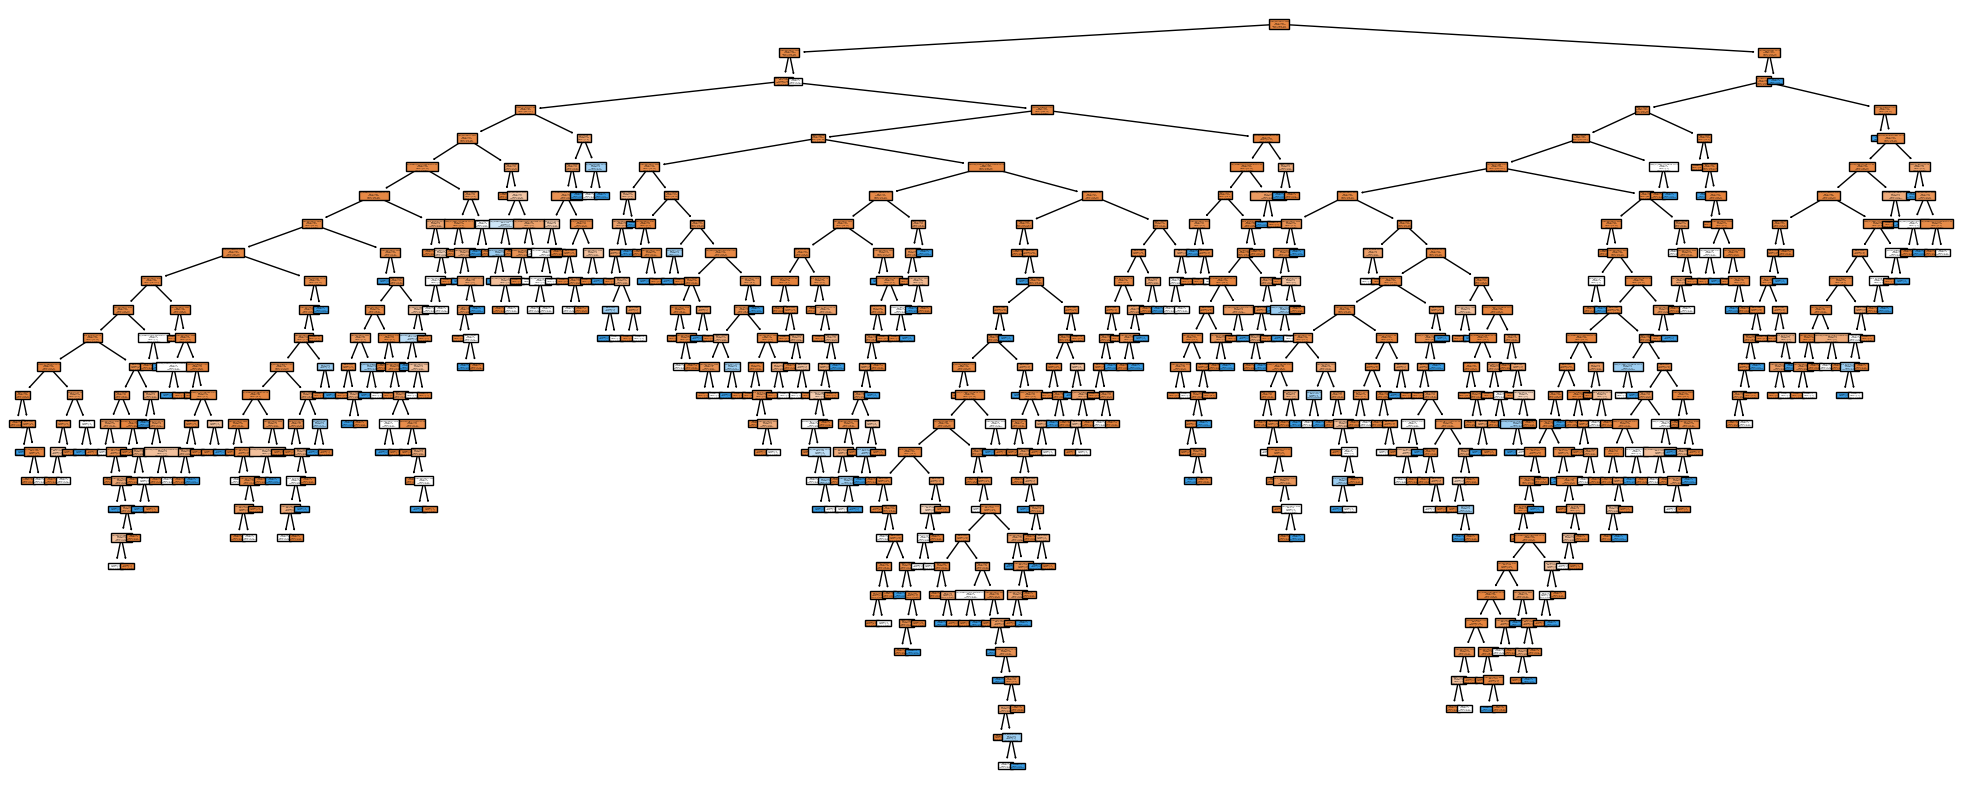

In [23]:
# 3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
plt.figure(figsize = (25, 10)) # uso da biblioteca matplotlib para visualização da arvore (altura = 25, largura = 10)
# plot_tree: função que gera a visualização da árvore de decisão
# clf: classificar definido e treinado anteriormente
# filled: filled = True define o preenchimento dos nós de cada cor
# class_names: especifica os nomes das classes que o modelo está prevendo. Para a variável 'mau', os valores são 'True' e 'False'
# feature_names: explicita o conjunto de varíaveis explicativas utilizadas para treinar o modelo
plot_tree(clf,
          filled = True,
          class_names = ['Aprovados', 'Reprovados'], # o primeiro elemento sempre é o valor 'False'
          feature_names = list(X.columns));

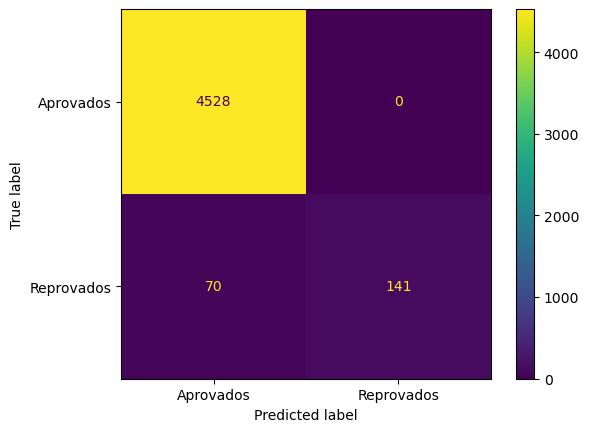

In [25]:
# 4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal
#de contas, são essas as decisões que se podem tomar com propostas de crédito.

# usamos a função predict() em X para prever o resultado da variável resposta (y)
# labels = clf.classes_ são as classes definidas anteriormente
cm = confusion_matrix(y_train, clf.predict(X_train), labels = clf.classes_)

MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [27]:
# 5. Calcule a acurácia na base de treinamento.
acuracia_train = accuracy_score(y_train, clf.predict(X_train))
acuracia_train

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

In [29]:
# 1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(X_test, y_test)

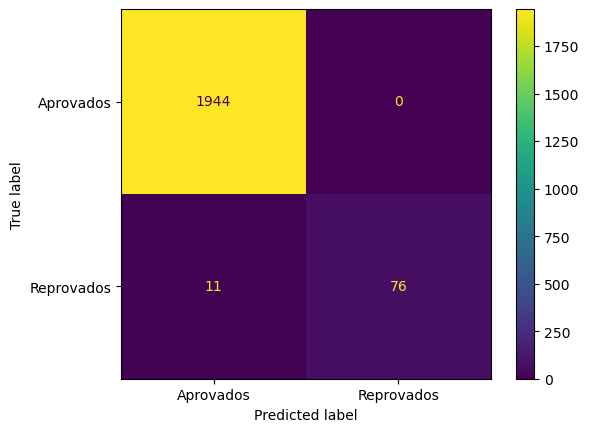

In [31]:
# 2. Produza a visualização da matriz de confusão para a base de teste.
cm = confusion_matrix(y_test, clf.predict(X_test), labels = clf.classes_)

MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [33]:
# 3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
acuracia_test = accuracy_score(y_test, clf.predict(X_test))
acuracia_test

0.9945839487936977

In [35]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz
# de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

# parâmetro 'max_depth' especifica a profunidade da arvore de decisão
# parâmetro 'min_samples_leaf' especifica o numero de observações por folha da arvore de decisão
clf = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 10, random_state = 123)
clf = clf.fit(X_train, y_train)

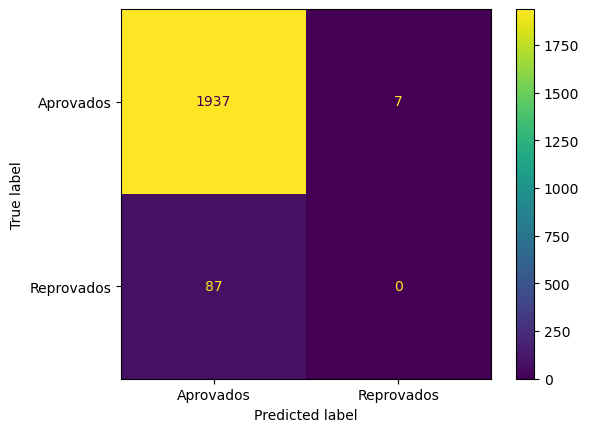

In [37]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz
# de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

# Definição da matriz de confusão do modelo teste apos o exercicio de pre puning
cm = confusion_matrix(y_test, clf.predict(X_test), labels = clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Aprovados', 'Reprovados'])
MatrizDeConfusao.plot()

In [39]:
# 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz
# de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

# cálculo da acurácia do modelo teste apos o exercicio de pre puning
acuracia_test = accuracy_score(y_test, clf.predict(X_test))
acuracia_test

0.9537173806006893